In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import pandas as pd

df = pd.read_excel("Data/딥러닝 컴피티션/data.xlsx")
df

,document,label
0,그럭저럭 볼만한 영화였다,1
1,도대체 뭔 내용??-_-기대했는데 완전 기대이하,0
2,오로지 최우식 보고싶어서 갔는데 (지방에는 해주지 않아서 서울까지 가서 보고왔어요ㅠ...,1
3,차라리 아무 이유없이 죽여대는 싸이코 패스였으면 이해가 가겠음... 주인공이 어릴때...,0
4,아이고 하노이스~ 잔뜩 궁금증이 있을꺼 같은 냄새만 풍기고 아무것도 없었다. 영화요...,0
...,...,...
37532,조폭코미디 장르에서 이 정도면 수작,1
37533,김소현때문에봤다가 조수향한테입덕할뻔. 그그 시진이하고.... 연기너무잘해,1
37534,와우~~~~엄청난영화입니바,1
37535,80년대 한국을 대표하는 에로작,0


부정적리뷰는 0, 긍정적리뷰는 1

In [10]:
import warnings
warnings.filterwarnings('ignore')

df = df.dropna(subset=["document", "label"])
df["document"] = df["document"].astype(str)

In [31]:
train_x, test_x, train_y, test_y = train_test_split(df["document"], df["label"]) 

In [146]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer 

vocab_size = 5000

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_x)

In [147]:
tokenizer.word_index

{'<OOV>': 1,
 '영화': 2,
 '너무': 3,
 '정말': 4,
 '진짜': 5,
 '이': 6,
 '그냥': 7,
 '왜': 8,
 '더': 9,
 '이런': 10,
 '영화를': 11,
 '수': 12,
 '그': 13,
 '다': 14,
 '좀': 15,
 '영화는': 16,
 '잘': 17,
 '보고': 18,
 '영화가': 19,
 'ㅋㅋ': 20,
 '봤는데': 21,
 '본': 22,
 '내가': 23,
 '최고의': 24,
 '이건': 25,
 '드라마': 26,
 '평점': 27,
 '없는': 28,
 '이거': 29,
 '아': 30,
 '없다': 31,
 '이게': 32,
 '완전': 33,
 '이렇게': 34,
 '참': 35,
 '연기': 36,
 '평점이': 37,
 '역시': 38,
 '다시': 39,
 '좋은': 40,
 '내': 41,
 '쓰레기': 42,
 '있는': 43,
 '스토리': 44,
 '그리고': 45,
 '최고': 46,
 '난': 47,
 'ㅠㅠ': 48,
 '보는': 49,
 '많이': 50,
 '한': 51,
 '하는': 52,
 '것': 53,
 '없고': 54,
 'ㅋ': 55,
 '아깝다': 56,
 '재밌게': 57,
 '꼭': 58,
 'ㅋㅋㅋ': 59,
 'ㅡㅡ': 60,
 '또': 61,
 '보면': 62,
 '무슨': 63,
 '영화다': 64,
 '마지막': 65,
 '작품': 66,
 '하지만': 67,
 '가장': 68,
 'ㅎㅎ': 69,
 '만든': 70,
 '그래도': 71,
 '뭐': 72,
 '별로': 73,
 '볼': 74,
 '봐도': 75,
 '끝까지': 76,
 '같은': 77,
 '솔직히': 78,
 '10점': 79,
 '지금': 80,
 '재미': 81,
 '와': 82,
 '하나': 83,
 '안': 84,
 '있다': 85,
 '아주': 86,
 '다른': 87,
 '말이': 88,
 '어떻게': 89,
 '아닌': 90,
 '같다': 91,
 '대한'

In [148]:
train_seq = tokenizer.texts_to_sequences(train_x) 
test_seq = tokenizer.texts_to_sequences(test_x)

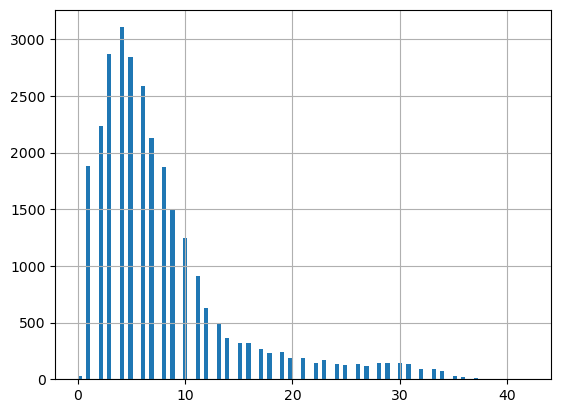

In [149]:
import matplotlib.pyplot as plt
box = []
for i in train_seq:
    box.append(len(i))

plt.hist(box, bins = "auto")
plt.grid()
plt.show()

In [134]:
import numpy as np
np.percentile(box, [90, 95, 99])

array([17., 23., 32.])

In [150]:
from keras.preprocessing.sequence import pad_sequences

train_seq2 = pad_sequences(train_seq, 40, padding="post", truncating="post")  
test_seq2 = pad_sequences(test_seq, 40, padding="post", truncating="post") 

# 모델링 

In [151]:
from tensorflow import keras
from keras.regularizers import l2
from keras.layers import Dense, Dropout, Input, BatchNormalization, Activation, Bidirectional
from keras.layers import Embedding
from keras.layers import SimpleRNN, LSTM
from tensorflow.keras.optimizers import AdamW

model = keras.Sequential([
    Input(shape = (40, )), 
    Embedding(input_dim = 5000, output_dim = 128), 
    Dropout(0.5),
    
    # LSTM(64),
    Bidirectional(LSTM(64)),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(32, activation="relu") ,
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(2, activation="softmax")
])

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

es = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_26 (Embedding)             │ (None, 40, 128)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_57 (Dropout)                 │ (None, 40, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_58 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_59 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 743,650 (2.84 MB)

 Trainable params: 743,330 (2.84 MB)

 Non-trainable params: 320 (1.25 KB)

In [152]:
history = model.fit(train_seq2, train_y, epochs = 30,
                   validation_data=(test_seq2, test_y),
                   callbacks = [es])

Epoch 1/30
880/880 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.5647 - loss: 0.9001 - val_accuracy: 0.6619 - val_loss: 0.6188
Epoch 2/30
880/880 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.7656 - loss: 0.4760 - val_accuracy: 0.7672 - val_loss: 0.4631
Epoch 3/30
880/880 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.7810 - loss: 0.4355 - val_accuracy: 0.7382 - val_loss: 0.5163
Epoch 4/30
880/880 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.8013 - loss: 0.4054 - val_accuracy: 0.7614 - val_loss: 0.4790
Epoch 5/30
880/880 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.8066 - loss: 0.3956 - val_accuracy: 0.7602 - val_loss: 0.4836


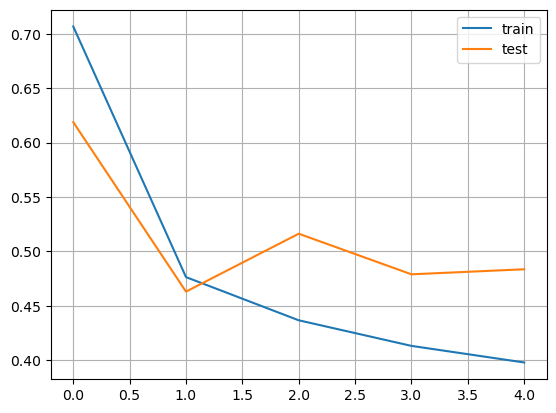

In [153]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "test"])
plt.grid()
plt.show()

In [154]:
model.evaluate(test_seq2, test_y)

294/294 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7543 - loss: 0.4763


[0.4631200432777405, 0.7671568393707275]

# submit 파일

In [155]:
submit = pd.read_excel("Data/딥러닝 컴피티션/submit.xlsx")
submit

,document,label
0,오래전 영화지만 참으로 매력있는 컨셉의 영화~~,NaN
1,참.....뭣같다....,NaN
2,이프로.. 미친거같아요ㅋㅋㅋ집밥의 친구들 로 프로이름 바꿔요!!그럼 이해라도 할게요...,NaN
3,중간에 반전을 알아채긴 했지만 어디선가 본듯한 이 반전이 60년대 영화라는 사실에 ...,NaN
4,왜 재밌었는데??? 너무 슬프게 처절했었던.. 오다기리의 그녀를 위해 잠을 자지 않...,NaN
...,...,...
12508,"은유와 상징, 풍자로 버무려진...기껏해봤자 전달하고자 하는바에 동의나 할 수 있는...",NaN
12509,영화만드시느라 고생하신건 알겠는데요. 별로네요...러브라인도 액션도 집중도도.......,NaN
12510,0점없나 ?ㅋㅋ예고편만봐~~,NaN
12511,아놔 10글자 쓰기도 아까운 영화다,NaN


In [156]:
submit_texts = submit["document"].astype(str)
submit_texts

0                               오래전 영화지만 참으로 매력있는 컨셉의 영화~~
1                                            참.....뭣같다....
2        이프로.. 미친거같아요ㅋㅋㅋ집밥의 친구들 로 프로이름 바꿔요!!그럼 이해라도 할게요...
3        중간에 반전을 알아채긴 했지만 어디선가 본듯한 이 반전이 60년대 영화라는 사실에 ...
4        왜 재밌었는데??? 너무 슬프게 처절했었던.. 오다기리의 그녀를 위해 잠을 자지 않...
                               ...                        
12508    은유와 상징, 풍자로 버무려진...기껏해봤자 전달하고자 하는바에 동의나 할 수 있는...
12509    영화만드시느라 고생하신건 알겠는데요. 별로네요...러브라인도 액션도 집중도도.......
12510                                      0점없나 ?ㅋㅋ예고편만봐~~
12511                                  아놔 10글자 쓰기도 아까운 영화다
12512                                             So so. ~
Name: document, Length: 12513, dtype: object

In [157]:
submit_seq = tokenizer.texts_to_sequences(submit_texts)

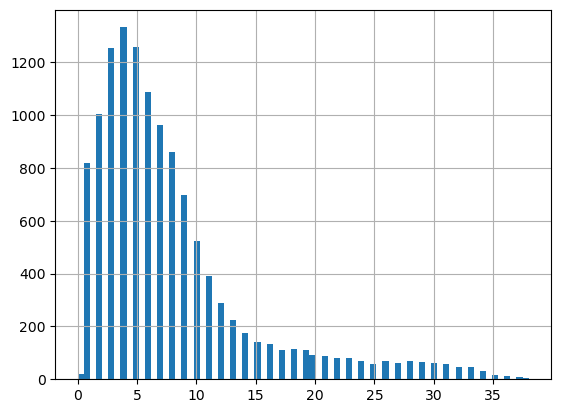

In [158]:
import matplotlib.pyplot as plt
box = []
for i in submit_seq:
    box.append(len(i))

plt.hist(box, bins = "auto")
plt.grid()
plt.show()

In [159]:
submit_pad = pad_sequences(submit_seq, 40, padding="post", truncating="post")

In [160]:
pred_probs = model.predict(submit_pad)

392/392 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [161]:
submit_labels = pred_probs.argmax(axis=1)

In [164]:
submit["label"] = submit_labels
submit

,document,label
0,오래전 영화지만 참으로 매력있는 컨셉의 영화~~,1
1,참.....뭣같다....,0
2,이프로.. 미친거같아요ㅋㅋㅋ집밥의 친구들 로 프로이름 바꿔요!!그럼 이해라도 할게요...,0
3,중간에 반전을 알아채긴 했지만 어디선가 본듯한 이 반전이 60년대 영화라는 사실에 ...,0
4,왜 재밌었는데??? 너무 슬프게 처절했었던.. 오다기리의 그녀를 위해 잠을 자지 않...,1
...,...,...
12508,"은유와 상징, 풍자로 버무려진...기껏해봤자 전달하고자 하는바에 동의나 할 수 있는...",0
12509,영화만드시느라 고생하신건 알겠는데요. 별로네요...러브라인도 액션도 집중도도.......,0
12510,0점없나 ?ㅋㅋ예고편만봐~~,1
12511,아놔 10글자 쓰기도 아까운 영화다,0


In [165]:
submit.to_excel("Data/딥러닝 컴피티션/submit_1.xlsx", index=False)